## Lecture 16 Bootstrap

* **Use the bootstrap to construct standard errors/confidence intervals for the least squares estimators of $\phi$ and $\sigma^2$:**
    * AR(1): $X_t =\phi X_{t-1} + \epsilon_t$, where $\epsilon_t \sim N(0,\sigma^2)$ i.i.d
* **Plot results and compare with normal distribution**

Set up parameters.
* Suppose that we have estimated $\phi$ and $\sigma^2$ using least squares on a sample of size $T=100$. Suppose we have
\[ \widehat{\phi} = .6635, \: \widehat{\sigma}^2 = 1.8393  \]
Below we implement a parametric bootstrap procedure to estimate standard errors/confidence intervals for these parameters.

In [7]:
class AR1_param:
    def __init__(self):
        self.phi = 0.6635
        self.sigma2 = 1.8393

AR1 = AR1_param()

In [8]:
AR1.phi

0.6635

In [9]:
AR1.sigma2

1.8393

Import the class to current script.

In [1]:
# Instead of defining the class directly, you can call this
# directly from the working dir. 

# When using Spyder, adding path to sys first
# import sys
# sys.path.append('path')

from AR1_param import AR1

print(AR1.phi)

print(AR1.sigma2)

0.6635
1.8393


Simulate data sets to implement the parametric "Bootstrap" routine. Here we apply 1000 repetitions.

In [10]:
import numpy as np

import statsmodels.api as sm

import time

In [11]:
sm.tsa.arma_generate_sample?

In [22]:
import numpy as np

import statsmodels.api as sm

import time

T       = 1000    #This is the original sample size

I       = 10000   #This is the number of bootstrap draws 

ar_param = np.array([1, -AR1.phi]) #AR component X_t + ceoff*X_{t-1}

ma_param = np.array([1])           #MA component \epsilon_t

Xsim       = np.zeros([T,I])       #Matrix of covariates for OLS

phi_OLS    = np.zeros(I)           #One estimator per artificial data set

sigma2_OLS = np.zeros(I)   

loop_start = time.time()

print('The parametric bootstrap is running...')

for i in range(I):  
    
    Xsim[:,i]     = sm.tsa.arma_generate_sample(ar=ar_param, ma=ma_param, nsample=T, sigma = AR1.sigma2**0.5, burnin=1000)
    
    Xaux          = np.matrix(Xsim[0:-1,i]) # Xaux is 1 by n

    Yaux          = np.transpose(np.matrix(Xsim[1:,i])) # Yaux is n by 1
    
    phi_OLS[i]    = (np.linalg.inv(Xaux*np.transpose(Xaux))*Xaux*Yaux)[0,0]
    
    sigma2_OLS[i] = np.mean((np.array(np.transpose(Yaux))-phi_OLS[i]*np.array(Xaux))**2)

loop_end = time.time()

print("The loop took {} seconds to finish.".format(loop_end-loop_start))


The parametric bootstrap is running...
The loop took 3.197558641433716 seconds to finish.


Plot the histogram of $\phi$ and $\sigma^2$.
* plt.hist():
    * `x` denotes the target variable
    * `bins` specifies the number of bars. By default, it is 10.
    * `alpha` specifies the degree of transparancy of bars.
    * `density` : a boolean argument. If True, values of the histogram bins will be the counts normalized to form a probability density, i.e., the area (or integral) under the histogram will sum to 1. This is achieved by dividing the count by the number of observations times the bin width and not dividing by the total number of observations. If `stacked` is also True, the sum of the histograms is normalized to 1. Default is False.
    * `cumulative` : a boolean argument. If True, then a histogram is computed where each bin gives the counts in that bin plus all bins for smaller values. The last bin gives the total number of datapoints. If density is also True then the histogram is normalized such that the last bin equals 1(gives cdf). Default is False.
* plt.subplot(nrows, ncols, index):
    * The three integers are number of rows, number of columns, and index in order. The subplot will take the index position on a grid with nrows rows and ncols columns. index starts at 1 in the upper left corner and increases to the right.


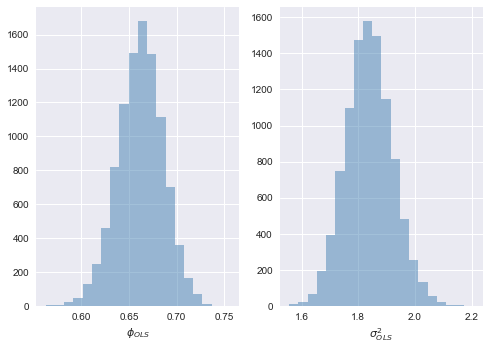

In [23]:
import matplotlib.pyplot as plt

plt.figure(1)

plt.subplot(121)

plt.hist(x=phi_OLS, bins = 20, facecolor='steelblue', alpha = 0.5)

plt.xlabel("$\phi_{OLS}$")

plt.subplot(122)

plt.hist(x=sigma2_OLS, bins = 20, facecolor='steelblue', alpha = 0.5)

plt.xlabel("$\sigma^2_{OLS}$")

plt.show()

We can get standard errors for the parameters of interest by looking at the quantiles of the distributions above

In [24]:
qt_phi    = np.quantile(phi_OLS, [0.025, 0.975])

qt_sigma2 = np.quantile(sigma2_OLS, [0.025, 0.975])

CI_phi    = [qt_phi[0],qt_phi[1]]

CI_sigma2 = [qt_sigma2[0],qt_sigma2[1]]

print('The bootstrap 95% confidence interval for the phi_OLS is:', CI_phi)
print('The bootstrap 95% confidence interval for the sigma2_OLS is:', CI_sigma2)

The bootstrap 95% confidence interval for the phi_OLS is: [0.6136767726671104, 0.7076557099314079]
The bootstrap 95% confidence interval for the sigma2_OLS is: [1.6821477832578664, 2.007676474890139]


Compare the empirical distribution of phihat with the normal approximation.
* `statsmodels.ECDF`: Compute the empirical cumulative distribution function of data.
    * Parameters:
        * x (array-like): Observations. (also range of the data points)
        * side ({'left', 'right'}, optional): Default is ‘right'. Define the shape of the intervals constituting the steps.‘right’correspond to [a, b) intervals and ‘left’ to (a, b].
    * Returns: Empirical CDF as a step function.
* np.linspace(start, stop, num): specify the observation. 
    * start and stop: the min and max of observations respectively
    * num: Number of samples to generate. Default is 50.
* In the output, the two arrays are outputs of plt.hist() with arguments of "density" and "cumulative". The first array is values of the normalized histogram bins. The second is edges of the bins: Length nbins + 1 (nbins left edges and right edge of last bin).


(array([2.000e-04, 6.000e-04, 1.100e-03, 2.400e-03, 4.200e-03, 8.000e-03,
        1.570e-02, 2.700e-02, 4.580e-02, 7.430e-02, 1.160e-01, 1.734e-01,
        2.489e-01, 3.390e-01, 4.413e-01, 5.527e-01, 6.627e-01, 7.577e-01,
        8.364e-01, 8.972e-01, 9.392e-01, 9.656e-01, 9.838e-01, 9.914e-01,
        9.967e-01, 9.995e-01, 9.999e-01, 9.999e-01, 9.999e-01, 1.000e+00]),
 array([0.56283502, 0.56927573, 0.57571644, 0.58215715, 0.58859786,
        0.59503858, 0.60147929, 0.60792   , 0.61436071, 0.62080142,
        0.62724213, 0.63368284, 0.64012355, 0.64656426, 0.65300497,
        0.65944569, 0.6658864 , 0.67232711, 0.67876782, 0.68520853,
        0.69164924, 0.69808995, 0.70453066, 0.71097137, 0.71741208,
        0.7238528 , 0.73029351, 0.73673422, 0.74317493, 0.74961564,
        0.75605635]),
 <a list of 30 Patch objects>)

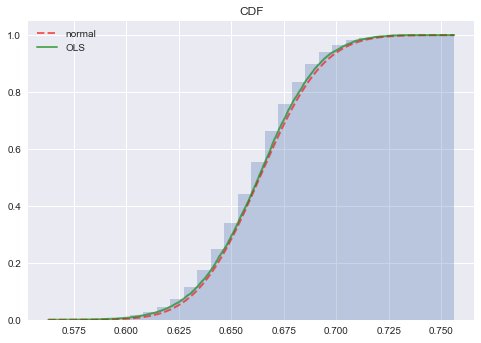

In [25]:
plt.style.use('seaborn') # pretty matplotlib plots, although not obvious here
from scipy import stats
from statsmodels.distributions.empirical_distribution import ECDF

x = np.linspace(np.amin(phi_OLS), np.amax(phi_OLS), I)

AsyVar=(1-(AR1.phi**2))/T
norm_cdf = stats.norm.cdf(x,loc=AR1.phi, scale=AsyVar**0.5)

ecdf = ECDF(phi_OLS)
OLScdf = ecdf(x)

plt.plot(x, norm_cdf, 'r--', lw=2, alpha=0.6)
plt.plot(x, OLScdf, 'g-', lw=2, alpha=0.6)      # lw: line width
plt.legend(['normal','OLS'], loc='upper left')
plt.title('CDF')
plt.hist(phi_OLS, alpha=0.3, bins = 30, cumulative= True, density = True)

In [ ]:
np.*?

In [ ]:
np.absolute?

In [ ]:
np.*?
